**Regression**

**ECG Dataset**

In [424]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/regression/ECG Datasets.xlsx")
data_E = df.to_numpy()

**preparing Dataset**

In [427]:
data = data_E
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)

def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii])) /(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_12916\2192583612.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_12916\2192583612.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**initialize RLS**

In [6]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2 = 5, 100 ,1
Q = 0.005
epoch =500
eta = 0.001

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
net1 = np.ones(n1)
o1 = np.ones(n1)
R1 = Q*np.eye(n0, n0)

#layer 2 information

w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
net2 = np.ones(n2)
o2 = np.ones(n2)
R2 = Q*np.eye(n1, n1)

def sigmoid(x):
    return 1/(1+np.exp(-x))
    

**implemention RLS**

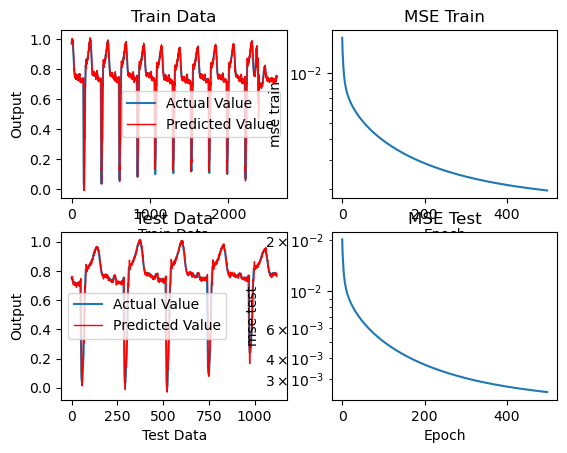

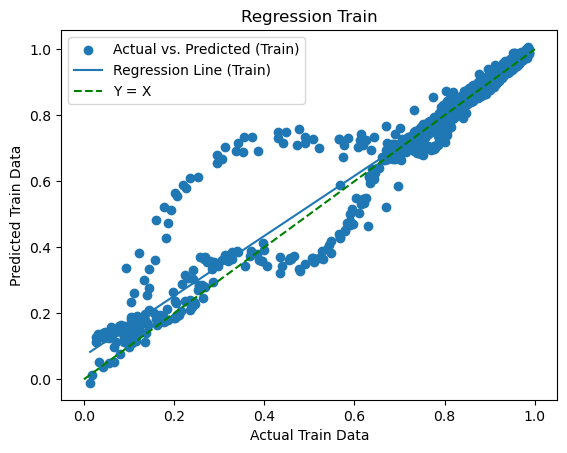

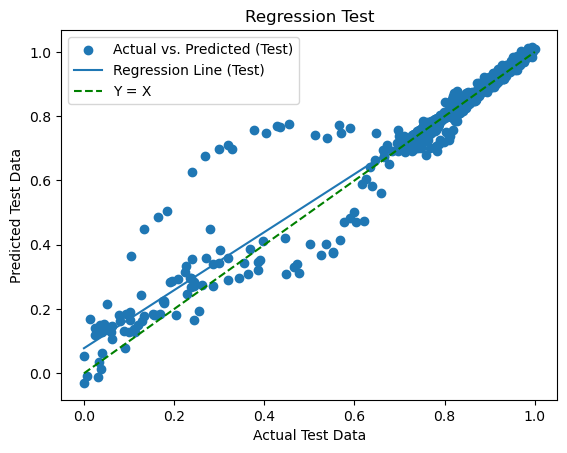

In [137]:
for t in range(epoch):
    e = np.zeros(num_train)
    for k in range(num_train):
        
        #Feed forwrad
        input_data = data[k, :5]
        net1 = np.dot(w1, input_data.reshape(n0,1)) 
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1) + bi2
        o2 = net2
        target = data[k, 5]
        e[k] = (target - o2)
        #f prim
        A = sigmoid(net1)*(1-sigmoid(net1))
        
        #Back Propafation
        #RLS to update w2
        R2 = np.dot(R2,(np.eye(n1,n1) - (np.dot(np.dot(o1,o1.T),R2))/(1+np.dot(np.dot(o1.T,R2),o1))))
        e2 = data[k, 5] - np.dot(w2,o1)
        w2 += np.dot(o1.T, R2)*e2
        #SGD to update w1
        w1 -= eta*(-2*e[k])*np.outer(np.dot(w2, A), input_data)

    #Train    
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for k in range(num_train):
        input_data = data[k, :5]
        net1 = np.dot(w1, input_data.T) 
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1) 
        o2 = net2
        target = data[k, 5]
        output_data_train[k] = o2
        e = (target - o2)
        error_square_train[k] = (e)**2
    mse_train[t] = np.mean(error_square_train)

    #Test
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for k in range(num_test):
        input_data = data[num_train + k, :5]
        net1 = np.dot(w1, input_data.T) 
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1)
        o2 = net2
        target = data[num_train + k, 5]
        output_data_test[k] = o2
        e = ( target- o2)
        error_square_test[k] = (e)**2
    mse_test[t] = np.mean( error_square_test)
    

    #Plot
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**intialize flexible RLS**

In [144]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2 = 5, 8,1
Q = 0.005
epoch =150
eta = 0.003

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
alpha = np.random.randn(n1)
net1 = np.ones(n1)
o1 = np.ones(n1)
R1 = Q*np.eye(n0, n0)

#layer 2 information

w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
net2 = np.ones(n2)
o2 = np.ones(n2)
R2 = Q*np.eye(n1, n1)
def sigmoid(x, a):
    return 1/(1+np.exp(-x*a))

**implemention flexible RLS**

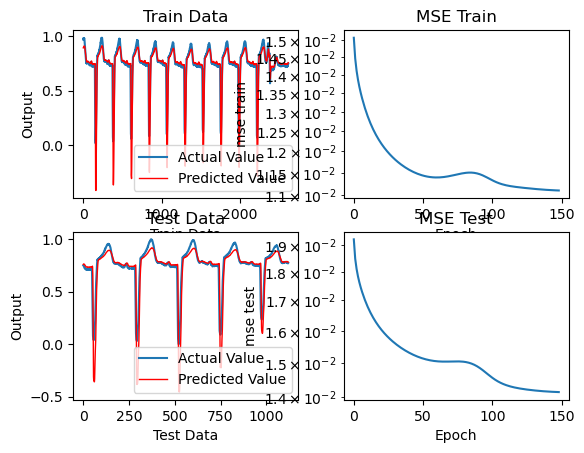

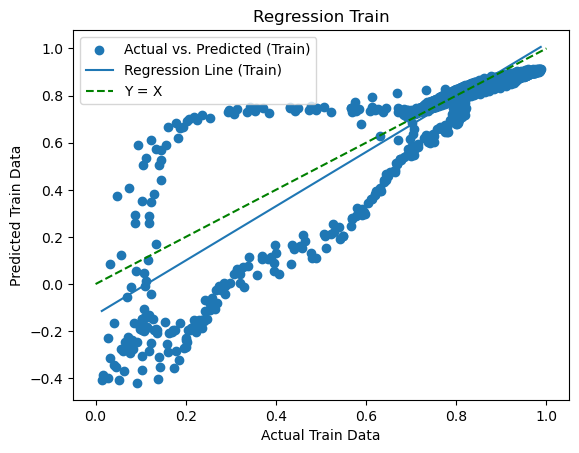

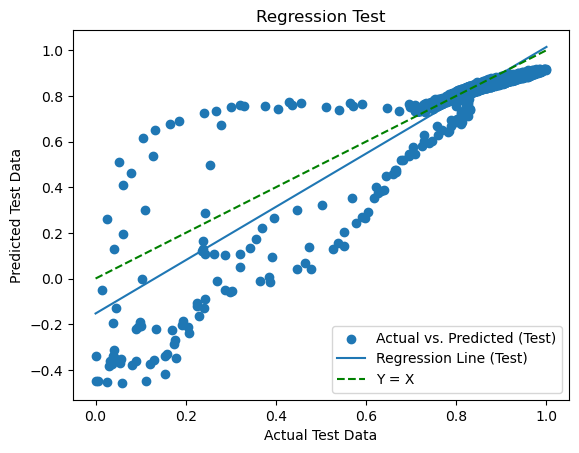

In [147]:
for t in range(epoch):
    e = np.zeros(num_train)
    for k in range(num_train):
        
        #Feed forwrad
        input_data = data[k, :5]
        net1 = np.dot(w1, input_data.T) 
        o1 = sigmoid(net1, alpha)
        net2 = np.dot(w2, o1) 
        o2 = net2
        target = data[k, 5]
        e[k] = (target - o2)
        
        #f prim
        A = sigmoid(net1, alpha)*(1-sigmoid(net1, alpha))
        #f star
        B = (net1*np.exp(-net1*alpha))/(1+np.exp(-net1*alpha))**2
        
        #Back Propafation
        #RLS to update w2
        R2 = np.dot(R2,(np.eye(n1,n1) - (np.dot(np.dot(o1,o1.T),R2))/(1+np.dot(np.dot(o1.T,R2),o1))))
        e2 = data[k, 5] - np.dot(w2,o1)
        w2 += np.dot(o1.T, R2)*e2
        #SGD to update w1
        w1 -= eta*(-2*e[k])*np.outer(np.dot(w2, A), input_data)
        alpha -= eta*(-2*e[k])*np.dot(w2, B)  
    

    #Train    
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for k in range(num_train):
        input_data = data[k, :5]
        net1 = np.dot(w1, input_data.T) 
        o1 = sigmoid(net1, alpha)
        net2 = np.dot(w2, o1) 
        o2 = net2
        target = data[k, 5]
        output_data_train[k] = o2
        e= (target - o2)
        error_square_train[k] = (e)**2
    mse_train[t] = np.mean(error_square_train)

    #Test
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for k in range(num_test):
        input_data = data[num_train + k, :5]
        net1 = np.dot(w1, input_data.T) 
        o1 = sigmoid(net1, alpha)
        net2 = np.dot(w2, o1)
        o2 = net2
        target = data[num_train + k, 5]
        output_data_test[k] = o2
        e= ( target- o2)
        error_square_test[k] = (e)**2
    mse_test[t] = np.mean( error_square_test)
    

    #Plot
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()

**initialize EKF**

In [225]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2 = 5, 5,1
Nw = n0*n1 + n2*n1 + n1 + n2

epoch =1000
epsilon = 100
eta = 1000

q = 0.01  
def adaptive_q(t):
    global q
    if t % 20 == 0 and t > 0:  
        q *= 0.1
    return q
        
mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

H = np.ones((Nw,n2))
w = np.ones((Nw,n2))
R = eta*np.eye(n2)
P = epsilon*np.eye(Nw)
Q = np.eye(Nw)
A = np.eye(n2)
K = np.ones((Nw, n2))


#layer 1 information
np.random.seed(42)
w1 = 1.2*np.random.randn(n1, n0)
#w1 = np.random.uniform(-1,1, (n1,n0))
bi1 = 0.5*np.random.randn(n1)
net1 = np.ones(n1)
o1 = np.ones(n1)

#layer 2 information
w2 = 1.2*np.random.randn(n2, n1)
#w2 = np.random.uniform(-1,1, (n2,n1))
bi2 = 0.5*np.random.randn(n2)
net2 = np.ones(n2)
o2 = np.ones(n2)

def sigmoid(x):
    return 1/(1+np.exp(-x))
    


**implemention EKF**

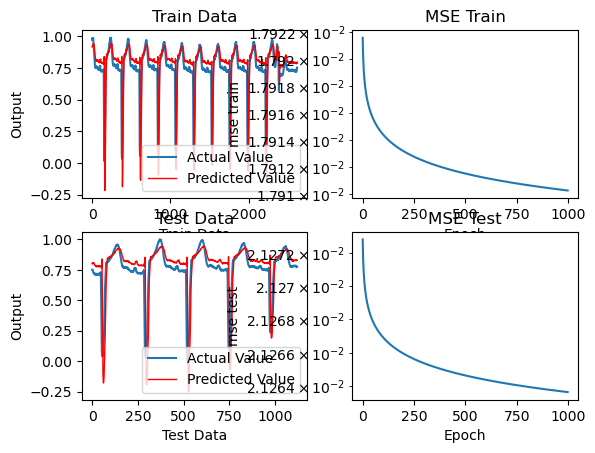

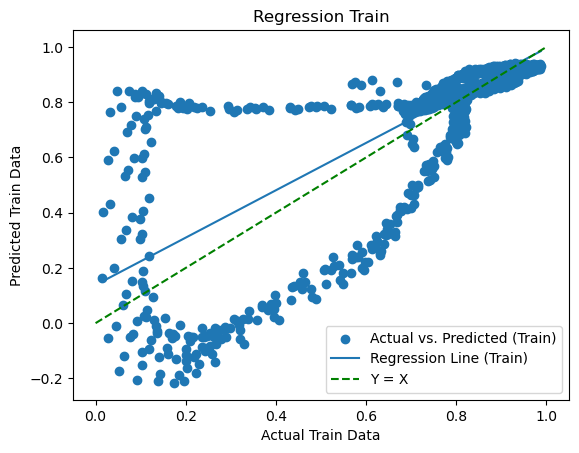

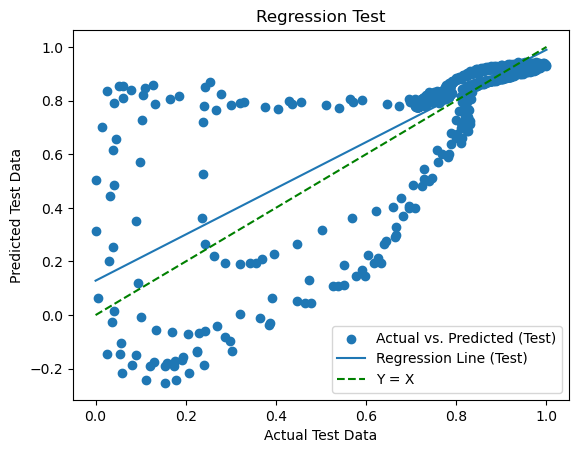

In [228]:
for t in range(epoch):
    e = np.zeros(num_train)
    for i in range(num_train):
        
        #FeedForward
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data.T)+bi1
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1)+bi2
        o2 = net2
        
        t1 = sigmoid(net1)*(1-sigmoid(net1))
        t1 = np.diag(t1)
        
 
        
        #BackPropagtion
        pw1 = np.outer(np.dot(w2,t1), input_data)
        pw2 = o1
        pbi1 = np.dot(w2,t1)
        pbi2 = 1
        
        a = pw1.ravel()
        b = pw2.ravel()
        c = pbi1.ravel()
        d =  np.array([pbi2])
        
        H = np.concatenate((a, b,c,d))
        a1 = w1.ravel()
        b1 = w2.ravel()
        c1 = bi1.ravel()
        d1  = bi2.ravel()
 
        
        w = np.concatenate((a1,b1,c1,d1))
        
        e = data[i, 5] - o2
        A = np.linalg.inv(R + np.dot(np.dot(H.T,P),H))
        K = np.outer(np.dot(P, H), A)
        #update P and w
        P  = P - np.dot(np.dot(K,H.reshape(1, Nw)), P) + adaptive_q(i)*Q
        w  = w + np.dot(K,e)
        
    a2 = w[:n0*n1]
    b2 = w[n0*n1:n0*n1+n1*n2]
    c2 = w[n0*n1+n1:n0*n1+n1*n2+n1]
    d2 = w[n0*n1 +n1*n2 +n1:]
    
    w1 = a2.reshape(n1,n0) 
    w2 = b2.reshape(n2,n1)
    bi1 = c2.reshape(n1)
    bi2 = d2.reshape(n2)

    #Train
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data.T) +bi1
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1) +bi2
        o2 = net2
        target = data[i, 5]
        output_data_train[i] = o2
        e= (target - o2)
        error_square_train[i] = (e)**2
    mse_train[t] = np.mean(error_square_train)

    #Test
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5] 
        net1 = np.dot(w1, input_data.T) +bi1
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1) + bi2
        o2 = net2
        target = data[num_train + i, 5]
        output_data_test[i] = o2
        e= ( target- o2)
        error_square_test[i] = (e)**2
    mse_test[t] = np.mean( error_square_test)
    

    #Plot
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()

**initialize flexible EKF**

In [429]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2 = 5, 5,1
Nw = n0*n1 + n2*n1 + n1 + n2+n1

epoch =210
epsilon = 1000
eta = 10000

q = 0.01  
def adaptive_q(t):
    global q
    if t % 2 == 0 and t > 0:  
        q *= 0.1
    return q
        
mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

H = np.ones((Nw,n2))
w = np.ones((Nw,n2))
R = eta*np.eye(n2)
P = epsilon*np.eye(Nw)
Q = 0.0001*np.eye(Nw)
A = np.eye(n2)
K = np.ones((Nw, n2))


#layer 1 information
np.random.seed(42)
w1 = 2.2*np.random.randn(n1, n0)
#w1 = np.random.uniform(-1,1, (n1,n0))
bi1 = 8.4*np.random.randn(n1)
alpha = 0.7*np.random.randn(n1)
net1 = np.ones(n1)
o1 = np.ones(n1)
palpha = np.ones(n1)

#layer 2 information
w2 = 2.2*np.random.randn(n2, n1)
#w2 = np.random.uniform(-1,1, (n2,n1))
bi2 = 8.4*np.random.randn(n2)
net2 = np.ones(n2)
o2 = np.ones(n2)

def sigmoid(x,alpha):
    return 1/(1+np.exp(-alpha*x))
    

**implemention flexible EKF**

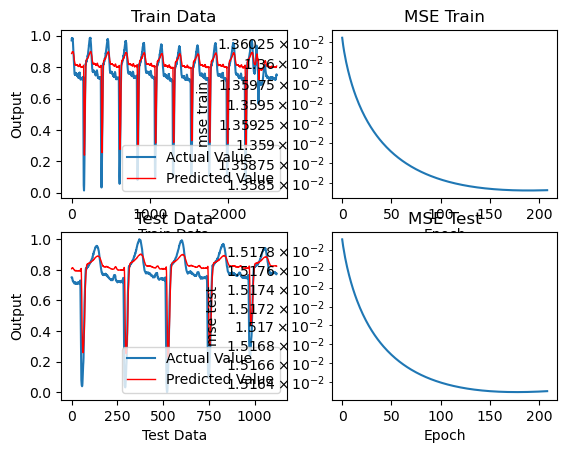

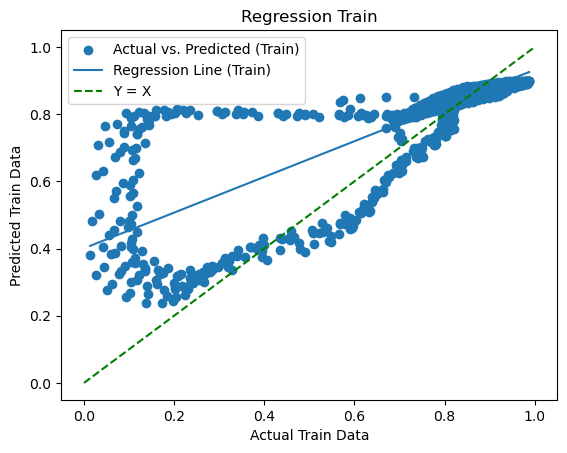

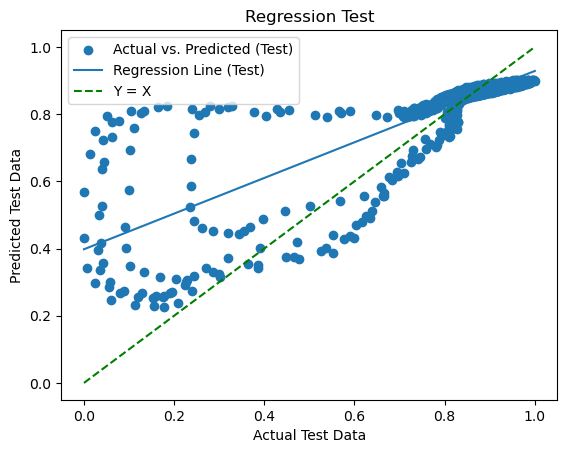

In [432]:
for t in range(epoch):
    e = np.zeros(num_train)
    for i in range(num_train):
        
        #FeedForward
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data.T)+bi1
        o1 = sigmoid(net1,alpha)
        net2 = np.dot(w2, o1)+bi2
        o2 = net2

        
        #fprim
        t1 = alpha*np.exp(-net1*alpha)/(1+np.exp(-net1*alpha))**2
        t1 = np.diag(t1)
        #fstar
        t2 = net1*np.exp(-net1*alpha)/(1+np.exp(-net1*alpha))**2
        t2 = np.diag(t2)
        
 
        
        #BackPropagtion
        pw1 = np.outer(np.dot(w2,t1), input_data)
        pw2 = o1
        pbi1 = np.dot(w2,t1)
        pbi2 = 1
        pbalpha = np.dot(w2,t2)
 
        a = pw1.ravel()
        b = pw2.ravel()
        c = pbi1.ravel()
        d = np.array([pbi2])
        f = palpha.ravel()
        
        H = np.concatenate((a, b,c,d,f))
        a1 = w1.ravel()
        b1 = w2.ravel()
        c1 = bi1.ravel()
        d1  = bi2.ravel()
        f1 = alpha.ravel()
 
        
        w = np.concatenate((a1,b1,c1,d1,f1))
        
        e = data[i, 5] - o2
        A = np.linalg.inv(R + np.dot(np.dot(H.T,P),H))
        K = np.outer(np.dot(P, H), A)
        #update P and w
        P  = P - np.dot(np.dot(K,H.reshape(1, Nw)), P) + adaptive_q(i)*Q
        w  = w + np.dot(K,e)
        
    a2 = w[:n0*n1]
    b2 = w[n0*n1:n0*n1+n1*n2]
    c2 = w[n0*n1+n1:n0*n1+n1*n2+n1]
    d2 = w[n0*n1 +n1*n2 +n1:n0*n1 +n1*n2 +n1+n2]
    f2 = w[n0*n1 +n1*n2 +n1+n2:]
    
    w1 = a2.reshape(n1,n0) 
    w2 = b2.reshape(n2,n1)
    bi1 = c2.reshape(n1)
    bi2 = d2.reshape(n2)
    alpha = f2.reshape(n1)

    #Train
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data.T) +bi1
        o1 = sigmoid(net1,alpha)
        net2 = np.dot(w2, o1) +bi2
        o2 = net2
        target = data[i, 5]
        output_data_train[i] = o2
        e= (target - o2)
        error_square_train[i] = (e)**2
    mse_train[t] = np.mean(error_square_train)

    #Test
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5] 
        net1 = np.dot(w1, input_data.T) +bi1
        o1 = sigmoid(net1,alpha)
        net2 = np.dot(w2, o1) + bi2
        o2 = net2
        target = data[num_train + i, 5]
        output_data_test[i] = o2
        e= ( target- o2)
        error_square_test[i] = (e)**2
    mse_test[t] = np.mean( error_square_test)
    

    #Plot
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()

**Lorenz Dataste**

In [434]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNT/regression/Lorenz Dataset.xlsx")
data_L = df.to_numpy()

**Preparing Dataset**

In [437]:
data = data_L
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)

def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii])) /(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_12916\2452252800.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_12916\2452252800.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**initialize RLS**

In [483]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2 = 5, 100 ,1
Q = 0.005
epoch =500
eta = 0.001

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
net1 = np.ones(n1)
o1 = np.ones(n1)
R1 = Q*np.eye(n0, n0)

#layer 2 information

w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
net2 = np.ones(n2)
o2 = np.ones(n2)
R2 = Q*np.eye(n1, n1)

def sigmoid(x):
    return 1/(1+np.exp(-x))
    

**Implemention RLS**

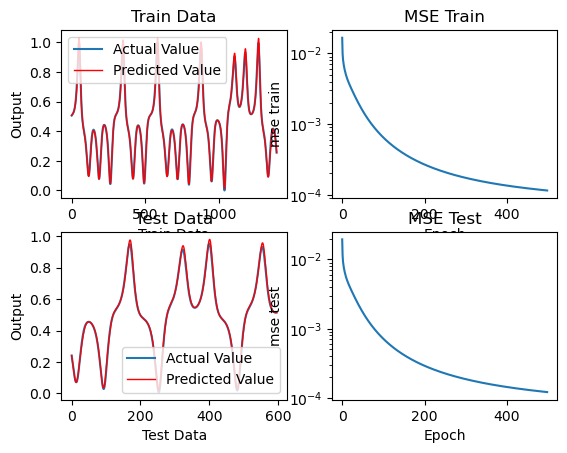

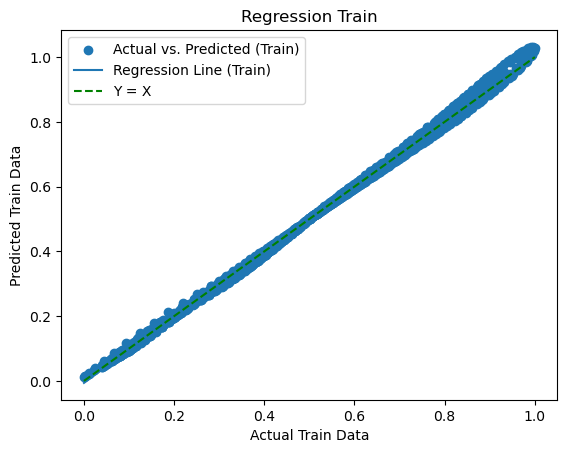

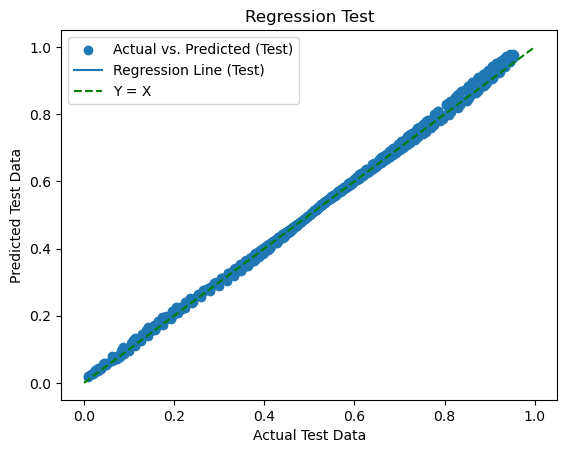

In [67]:
for t in range(epoch):
    e = np.zeros(num_train)
    for k in range(num_train):
        
        #Feed forwrad
        input_data = data[k, :5]
        net1 = np.dot(w1, input_data.reshape(n0,1)) 
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1) + bi2
        o2 = net2
        target = data[k, 5]
        e[k] = (target - o2)
        #f prim
        A = sigmoid(net1)*(1-sigmoid(net1))
        
        #Back Propafation
        #RLS to update w2
        R2 = np.dot(R2,(np.eye(n1,n1) - (np.dot(np.dot(o1,o1.T),R2))/(1+np.dot(np.dot(o1.T,R2),o1))))
        e2 = data[k, 5] - np.dot(w2,o1)
        w2 += np.dot(o1.T, R2)*e2
        #SGD to update w1
        w1 -= eta*(-2*e[k])*np.outer(np.dot(w2, A), input_data)

    #Train    
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for k in range(num_train):
        input_data = data[k, :5]
        net1 = np.dot(w1, input_data.T) 
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1) 
        o2 = net2
        target = data[k, 5]
        output_data_train[k] = o2
        e = (target - o2)
        error_square_train[k] = (e)**2
    mse_train[t] = np.mean(error_square_train)

    #Test
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for k in range(num_test):
        input_data = data[num_train + k, :5]
        net1 = np.dot(w1, input_data.T) 
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1)
        o2 = net2
        target = data[num_train + k, 5]
        output_data_test[k] = o2
        e = ( target- o2)
        error_square_test[k] = (e)**2
    mse_test[t] = np.mean( error_square_test)
    

    #Plot
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()


**initialize flexible RLS**

In [194]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2 = 5, 8,1
Q = 0.005
epoch =800
eta = 0.004

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)


#layer 1 information
np.random.seed(42)
w1 = np.random.randn(n1, n0)
bi1 = np.random.randn(n1)
alpha = np.random.randn(n1)
net1 = np.ones(n1)
o1 = np.ones(n1)
R1 = Q*np.eye(n0, n0)

#layer 2 information

w2 = np.random.randn(n2, n1)
bi2 = np.random.randn(n2)
net2 = np.ones(n2)
o2 = np.ones(n2)
R2 = Q*np.eye(n1, n1)
def sigmoid(x, a):
    return 1/(1+np.exp(-x*a))

**implemention flexible RLS**

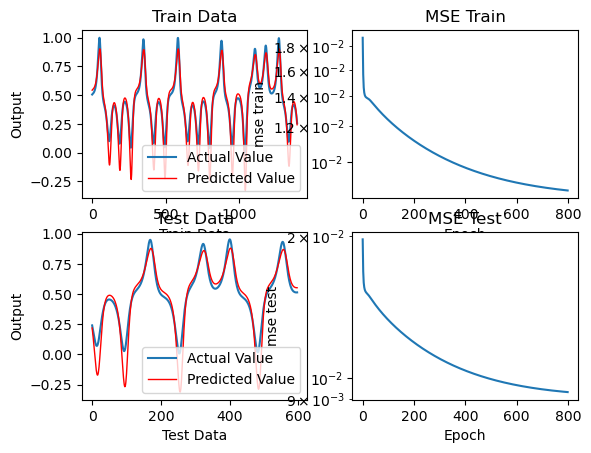

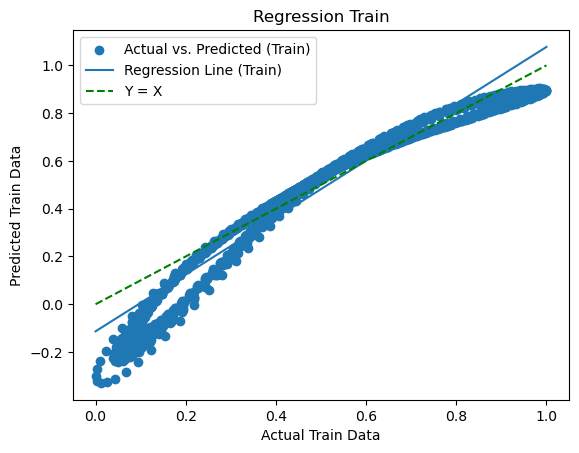

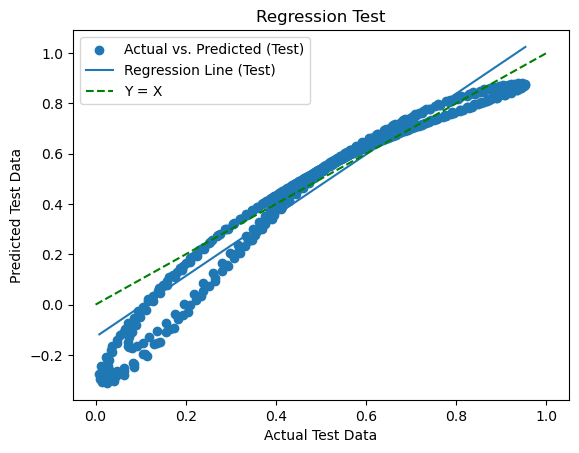

In [197]:
for t in range(epoch):
    e = np.zeros(num_train)
    for k in range(num_train):
        
        #Feed forwrad
        input_data = data[k, :5]
        net1 = np.dot(w1, input_data.T) 
        o1 = sigmoid(net1, alpha)
        net2 = np.dot(w2, o1) 
        o2 = net2
        target = data[k, 5]
        e[k] = (target - o2)
        
        #f prim
        A = sigmoid(net1, alpha)*(1-sigmoid(net1, alpha))
        #f star
        B = (net1*np.exp(-net1*alpha))/(1+np.exp(-net1*alpha))**2
        
        #Back Propafation
        #RLS to update w2
        R2 = np.dot(R2,(np.eye(n1,n1) - (np.dot(np.dot(o1,o1.T),R2))/(1+np.dot(np.dot(o1.T,R2),o1))))
        e2 = data[k, 5] - np.dot(w2,o1)
        w2 += np.dot(o1.T, R2)*e2
        #SGD to update w1
        w1 -= eta*(-2*e[k])*np.outer(np.dot(w2, A), input_data)
        alpha -= eta*(-2*e[k])*np.dot(w2, B)  
    

    #Train    
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for k in range(num_train):
        input_data = data[k, :5]
        net1 = np.dot(w1, input_data.T) 
        o1 = sigmoid(net1, alpha)
        net2 = np.dot(w2, o1) 
        o2 = net2
        target = data[k, 5]
        output_data_train[k] = o2
        e= (target - o2)
        error_square_train[k] = (e)**2
    mse_train[t] = np.mean(error_square_train)

    #Test
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for k in range(num_test):
        input_data = data[num_train + k, :5]
        net1 = np.dot(w1, input_data.T) 
        o1 = sigmoid(net1, alpha)
        net2 = np.dot(w2, o1)
        o2 = net2
        target = data[num_train + k, 5]
        output_data_test[k] = o2
        e= ( target- o2)
        error_square_test[k] = (e)**2
    mse_test[t] = np.mean( error_square_test)
    

    #Plot
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()

**initialize EKF**

In [185]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2 = 5, 5,1
Nw = n0*n1 + n2*n1 + n1 + n2

epoch =1000
epsilon = 100
eta = 1000

q = 0.01  
def adaptive_q(t):
    global q
    if t % 20 == 0 and t > 0:  
        q *= 0.1
    return q
        
mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

H = np.ones((Nw,n2))
w = np.ones((Nw,n2))
R = eta*np.eye(n2)
P = epsilon*np.eye(Nw)
Q = np.eye(Nw)
A = np.eye(n2)
K = np.ones((Nw, n2))


#layer 1 information
np.random.seed(42)
w1 = 1.2*np.random.randn(n1, n0)
#w1 = np.random.uniform(-1,1, (n1,n0))
bi1 = 0.5*np.random.randn(n1)
net1 = np.ones(n1)
o1 = np.ones(n1)

#layer 2 information
w2 = 1.2*np.random.randn(n2, n1)
#w2 = np.random.uniform(-1,1, (n2,n1))
bi2 = 0.5*np.random.randn(n2)
net2 = np.ones(n2)
o2 = np.ones(n2)

def sigmoid(x):
    return 1/(1+np.exp(-x))
    

**Implemention EKF**

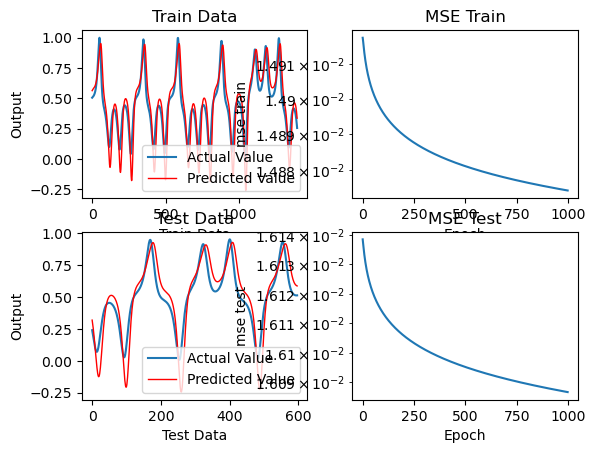

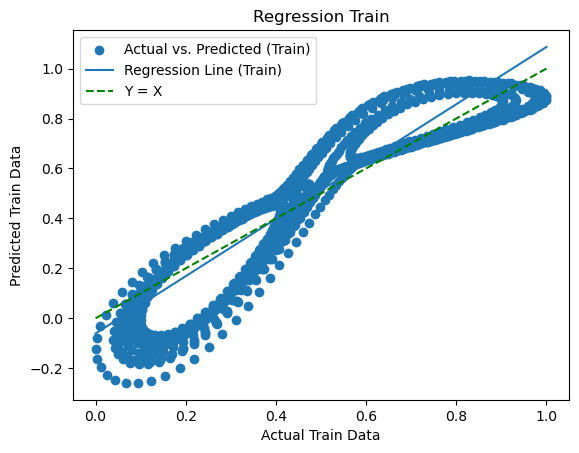

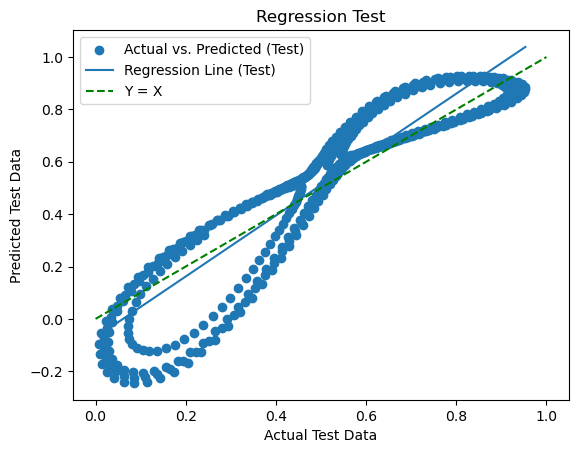

In [188]:
for t in range(epoch):
    e = np.zeros(num_train)
    for i in range(num_train):
        
        #FeedForward
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data.T)+bi1
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1)+bi2
        o2 = net2
        
        t1 = sigmoid(net1)*(1-sigmoid(net1))
        t1 = np.diag(t1)
        
 
        
        #BackPropagtion
        pw1 = np.outer(np.dot(w2,t1), input_data)
        pw2 = o1
        pbi1 = np.dot(w2,t1)
        pbi2 = 1
        
        a = pw1.ravel()
        b = pw2.ravel()
        c = pbi1.ravel()
        d =  np.array([pbi2])
        
        H = np.concatenate((a, b,c,d))
        a1 = w1.ravel()
        b1 = w2.ravel()
        c1 = bi1.ravel()
        d1  = bi2.ravel()
 
        
        w = np.concatenate((a1,b1,c1,d1))
        
        e = data[i, 5] - o2
        A = np.linalg.inv(R + np.dot(np.dot(H.T,P),H))
        K = np.outer(np.dot(P, H), A)
        #update P and w
        P  = P - np.dot(np.dot(K,H.reshape(1, Nw)), P) + adaptive_q(i)*Q
        w  = w + np.dot(K,e)
        
    a2 = w[:n0*n1]
    b2 = w[n0*n1:n0*n1+n1*n2]
    c2 = w[n0*n1+n1:n0*n1+n1*n2+n1]
    d2 = w[n0*n1 +n1*n2 +n1:]
    
    w1 = a2.reshape(n1,n0) 
    w2 = b2.reshape(n2,n1)
    bi1 = c2.reshape(n1)
    bi2 = d2.reshape(n2)

    #Train
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data.T) +bi1
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1) +bi2
        o2 = net2
        target = data[i, 5]
        output_data_train[i] = o2
        e= (target - o2)
        error_square_train[i] = (e)**2
    mse_train[t] = np.mean(error_square_train)

    #Test
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5] 
        net1 = np.dot(w1, input_data.T) +bi1
        o1 = sigmoid(net1)
        net2 = np.dot(w2, o1) + bi2
        o2 = net2
        target = data[num_train + i, 5]
        output_data_test[i] = o2
        e= ( target- o2)
        error_square_test[i] = (e)**2
    mse_test[t] = np.mean( error_square_test)
    

    #Plot
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()

**Initialize flexible EKF**

In [449]:
num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0, n1, n2 = 5, 5,1
Nw = n0*n1 + n2*n1 + n1 + n2+n1

epoch =1000
epsilon = 1000
eta = 10000

q = 0.01  
def adaptive_q(t):
    global q
    if t % 2 == 0 and t > 0:  
        q *= 0.1
    return q
        
mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)

H = np.ones((Nw,n2))
w = np.ones((Nw,n2))
R = eta*np.eye(n2)
P = epsilon*np.eye(Nw)
Q = 0.0001*np.eye(Nw)
A = np.eye(n2)
K = np.ones((Nw, n2))


#layer 1 information
np.random.seed(42)
w1 = 2.2*np.random.randn(n1, n0)
#w1 = np.random.uniform(-1,1, (n1,n0))
bi1 = 8.4*np.random.randn(n1)
alpha = 0.7*np.random.randn(n1)
net1 = np.ones(n1)
o1 = np.ones(n1)
palpha = np.ones(n1)

#layer 2 information
w2 = 2.2*np.random.randn(n2, n1)
#w2 = np.random.uniform(-1,1, (n2,n1))
bi2 = 8.4*np.random.randn(n2)
net2 = np.ones(n2)
o2 = np.ones(n2)

def sigmoid(x,alpha):
    return 1/(1+np.exp(-alpha*x))
    

**implemention flexible KEF**

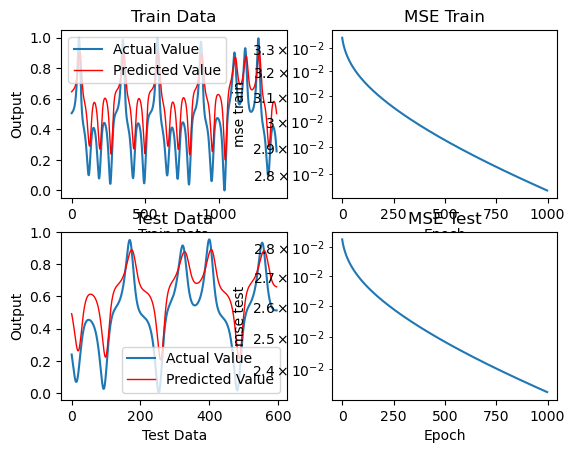

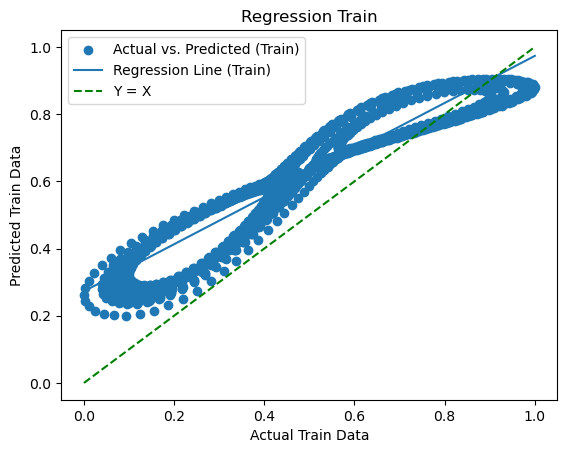

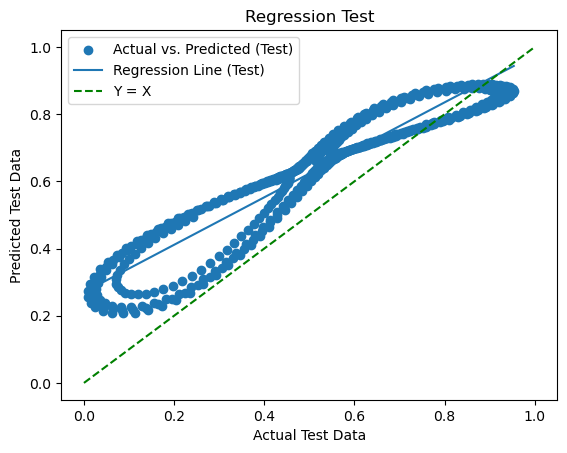

In [452]:
for t in range(epoch):
    e = np.zeros(num_train)
    for i in range(num_train):
        
        #FeedForward
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data.T)+bi1
        o1 = sigmoid(net1,alpha)
        net2 = np.dot(w2, o1)+bi2
        o2 = net2

        
        #fprim
        t1 = alpha*np.exp(-net1*alpha)/(1+np.exp(-net1*alpha))**2
        t1 = np.diag(t1)
        #fstar
        t2 = net1*np.exp(-net1*alpha)/(1+np.exp(-net1*alpha))**2
        t2 = np.diag(t2)
        
 
        
        #BackPropagtion
        pw1 = np.outer(np.dot(w2,t1), input_data)
        pw2 = o1
        pbi1 = np.dot(w2,t1)
        pbi2 = 1
        pbalpha = np.dot(w2,t2)
 
        a = pw1.ravel()
        b = pw2.ravel()
        c = pbi1.ravel()
        d = np.array([pbi2])
        f = palpha.ravel()
        
        H = np.concatenate((a, b,c,d,f))
        a1 = w1.ravel()
        b1 = w2.ravel()
        c1 = bi1.ravel()
        d1  = bi2.ravel()
        f1 = alpha.ravel()
 
        
        w = np.concatenate((a1,b1,c1,d1,f1))
        
        e = data[i, 5] - o2
        A = np.linalg.inv(R + np.dot(np.dot(H.T,P),H))
        K = np.outer(np.dot(P, H), A)
        #update P and w
        P  = P - np.dot(np.dot(K,H.reshape(1, Nw)), P) + adaptive_q(i)*Q
        w  = w + np.dot(K,e)
        
    a2 = w[:n0*n1]
    b2 = w[n0*n1:n0*n1+n1*n2]
    c2 = w[n0*n1+n1:n0*n1+n1*n2+n1]
    d2 = w[n0*n1 +n1*n2 +n1:n0*n1 +n1*n2 +n1+n2]
    f2 = w[n0*n1 +n1*n2 +n1+n2:]
    
    w1 = a2.reshape(n1,n0) 
    w2 = b2.reshape(n2,n1)
    bi1 = c2.reshape(n1)
    bi2 = d2.reshape(n2)
    alpha = f2.reshape(n1)

    #Train
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        input_data = data[i, :5]
        net1 = np.dot(w1, input_data.T) +bi1
        o1 = sigmoid(net1,alpha)
        net2 = np.dot(w2, o1) +bi2
        o2 = net2
        target = data[i, 5]
        output_data_train[i] = o2
        e= (target - o2)
        error_square_train[i] = (e)**2
    mse_train[t] = np.mean(error_square_train)

    #Test
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        input_data = data[num_train + i, :5] 
        net1 = np.dot(w1, input_data.T) +bi1
        o1 = sigmoid(net1,alpha)
        net2 = np.dot(w2, o1) + bi2
        o2 = net2
        target = data[num_train + i, 5]
        output_data_test[i] = o2
        e= ( target- o2)
        error_square_test[i] = (e)**2
    mse_test[t] = np.mean( error_square_test)
    

    #Plot
    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(data[:num_train, 5], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(data[num_train:num_data, 5], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
  coefficients = np.polyfit(x, y, 1)
  polynomial = np.poly1d(coefficients)
  x_line = np.linspace(min(x), max(x), 100)
  y_line = polynomial(x_line)
  plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(data[:num_train, 5], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(data[:num_train, 5], output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(data[num_train:num_data, 5], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(data[num_train:num_data, 5], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()